#Merging DataFrames with pandas

## Work By- 

**Ravjot Singh**

[LinkedIn](https://www.linkedin.com/in/ravjot03/)

[Github](https://github.com/Ravjot03)

[Medium](https://medium.com/@ravjot03)

[Twitter](https://twitter.com/ravjot03)

E-Mail: ravjot313@gmail.com

Mobile: +91-9654446404 (IND)

## Importing the required libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas.util.testing as tm

## Importing the datasets

In [0]:
bronze = pd.read_csv('bronze_top5.csv')
silver = pd.read_csv('silver_top5.csv')

## Data Analysis Part

### Adding a new column "NOC "to Bronze Dataset consisting of short codes of each country

In [0]:
bronze['NOC'] = ['USA','SOV','UKD','FRA','GER']

### Changing the column order of the data

In [115]:
bronze_cols = ['NOC','Country','Total']
bronze = bronze[bronze_cols]
print(bronze)

   NOC         Country   Total
0  USA   United States  1052.0
1  SOV    Soviet Union   584.0
2  UKD  United Kingdom   505.0
3  FRA          France   475.0
4  GER         Germany   454.0


### Assiging the short codes of each country to a new column in the Silver dataset

In [0]:
silver['NOC'] = ['USA','SOV','UKD','FRA','ITY']

### Changing the order of the columns

In [116]:
silver_cols = ['NOC','Country','Total']
silver = silver[silver_cols]
print(silver)

   NOC         Country   Total
0  USA   United States  1195.0
1  SOV    Soviet Union   627.0
2  UKD  United Kingdom   591.0
3  FRA          France   461.0
4  ITY           Italy   394.0


## Merging Datasets

### Merging all columns

This function takes all the columns of both the datasets to merge.

That is the rows of merge dataframe consists of all rows where the "NOC", "Country" and "Total" columns are identical in both the dataframes Bronze and Silver. 

Thus this merge gives us an empty dataframe because the columns does't match.

In [118]:
pd.merge(bronze, silver)

,NOC,Country,Total


### Merging ON

So now, we our taking a particular column to merge on.

"NOC" in our case.

All the remaining columns are appended to our right.
The column labels that are identical will change with their suffixes _x and _y according to their origin.

_x - for the first arguemnt to merge

_y - for the secoond arguement

In [119]:
pd.merge(bronze, silver, on='NOC')

,NOC,Country_x,Total_x,Country_y,Total_y
0,USA,United States,1052.0,United States,1195.0
1,SOV,Soviet Union,584.0,Soviet Union,627.0
2,UKD,United Kingdom,505.0,United Kingdom,591.0
3,FRA,France,475.0,France,461.0


### Merging ON Multiple Columns

As the country_x and country_y columns are same.

To eliminate the identical columns use "Country" column in the "on" parameter along with "NOC" to merge on both the columns.

In this way, merge function differs from concatinating (pd.concat() funtion) as merging is allowing  to merge on multiple columns.

In [120]:
pd.merge(bronze, silver, on=['NOC','Country'])

,NOC,Country,Total_x,Total_y
0,USA,United States,1052.0,1195.0
1,SOV,Soviet Union,584.0,627.0
2,UKD,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0


### Using Suffixes

We can tailor the column labels with "suffixes" parameter. With this function we can take whatever custom names to choose for the column labels that are identical.

In [121]:
pd.merge(bronze, silver, on=['NOC','Country'], suffixes=['_bronze_medals','_silver_medals'])

,NOC,Country,Total_bronze_medals,Total_silver_medals
0,USA,United States,1052.0,1195.0
1,SOV,Soviet Union,584.0,627.0
2,UKD,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0


### Merging with Inner join

Function merge does an inner join by default.

That is it extracts the rows that matches in the joining column ("on' parameter) from both dataframes and enclose them together in a joined dataframe

We can specify how='inner' but it is a default behaviour for the function.So, it is optional.

In [122]:
pd.merge(bronze, silver, on=['NOC','Country'], suffixes=['_bronze_medals','_silver_medals'], how='inner')

,NOC,Country,Total_bronze_medals,Total_silver_medals
0,USA,United States,1052.0,1195.0
1,SOV,Soviet Union,584.0,627.0
2,UKD,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0


### Merging with left join

 1. By specifying how='left' keeps all the rows of the left dataframe in the merged dataframe.

 2. For rows in the left dataframe with matches in the right dataframe -

    Non-joining columns of right dataframe are appended to the left dataframe.

3. For rows in the left dataframe with no matches in the right dataframe - 

    Non joining columns are filled with nulls


For eg  - The row from the Germany is retained with a null value. Because Silver Medals dataframe have no Germany row.


In [124]:
pd.merge(bronze, silver, on=['NOC','Country'], suffixes=['_bronze_medals','_silver_medals'], how='left')

,NOC,Country,Total_bronze_medals,Total_silver_medals
0,USA,United States,1052.0,1195.0
1,SOV,Soviet Union,584.0,627.0
2,UKD,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0
4,GER,Germany,454.0,NaN


### Merging with right join

Conversely, we can do right join.

In this example we have reatined all 5 rows from the Silver Medals dataframe. This time Italy has nan entry in the total bronze medals column beacuse Bronze Medals dataframe has no Italy row.

In [125]:
pd.merge(bronze, silver, on=['NOC','Country'], suffixes=['_bronze_medals','_silver_medals'], how='right')

,NOC,Country,Total_bronze_medals,Total_silver_medals
0,USA,United States,1052.0,1195.0
1,SOV,Soviet Union,584.0,627.0
2,UKD,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0
4,ITY,Italy,NaN,394.0


### Merging with outer join

Finally the union of all the rows from both the dataframes can be preserved with an outer join.

With the argument how='outer', we can clearly see that Germany is not present in the Silver medals winning countries and Italy in the Bronze medals winning countries


In [164]:
result = pd.merge(bronze, silver, on=['NOC','Country'], suffixes=['_bronze_medals','_silver_medals'], how='outer')
result

,NOC,Country,Total_bronze_medals,Total_silver_medals
0,USA,United States,1052.0,1195.0
1,SOV,Soviet Union,584.0,627.0
2,UKD,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0
4,GER,Germany,454.0,NaN
5,ITY,Italy,NaN,394.0


## Updating DataFrame

### Filling the NaN values in the dataframe with .fillna(0) function

In [0]:
result.fillna(0, inplace=True)

### Updated DataFrame

In [166]:
result

,NOC,Country,Total_bronze_medals,Total_silver_medals
0,USA,United States,1052.0,1195.0
1,SOV,Soviet Union,584.0,627.0
2,UKD,United Kingdom,505.0,591.0
3,FRA,France,475.0,461.0
4,GER,Germany,454.0,0.0
5,ITY,Italy,0.0,394.0


### Adding a new column that adds the bronze and silver medals of each country.

In [167]:
result['Total Medals'] = result['Total_bronze_medals'] + result['Total_silver_medals']
result

,NOC,Country,Total_bronze_medals,Total_silver_medals,Total Medals
0,USA,United States,1052.0,1195.0,2247.0
1,SOV,Soviet Union,584.0,627.0,1211.0
2,UKD,United Kingdom,505.0,591.0,1096.0
3,FRA,France,475.0,461.0,936.0
4,GER,Germany,454.0,0.0,454.0
5,ITY,Italy,0.0,394.0,394.0


## Visualization Part

Some visualizations have been made to give some better insights from the data.

## 1st Visualization
Showing the barplot of Total Bronze and Silver Medals of Each country

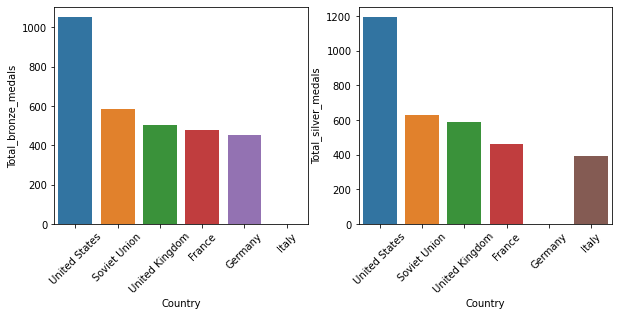

In [219]:
fig, [ax1, ax2] = plt.subplots(1, 2)
fig.set_size_inches(10,4)
sns.barplot(data=result, x='Country', y='Total_bronze_medals', ax=ax1)
sns.barplot(data=result, x='Country', y='Total_silver_medals', ax=ax2)

ax1.set_xticklabels(result['Country'], rotation=45)
ax2.set_xticklabels(result['Country'], rotation=45)
plt.show()

## 2nd Visualization
Showing Total medals vs country column

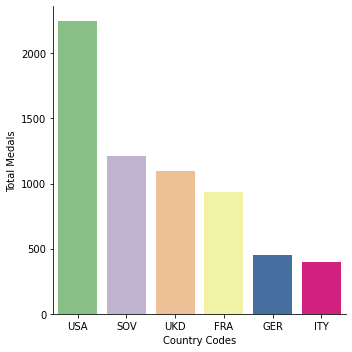

In [226]:
plot = sns.catplot(data=result, x='NOC',y='Total Medals', kind='bar', palette='Accent')
plot.set(xlabel='Country Codes')
plt.show()

## 3rd Visualization
This is a gridspec of 1st and 2nd Visualizations

<BarContainer object of 6 artists>

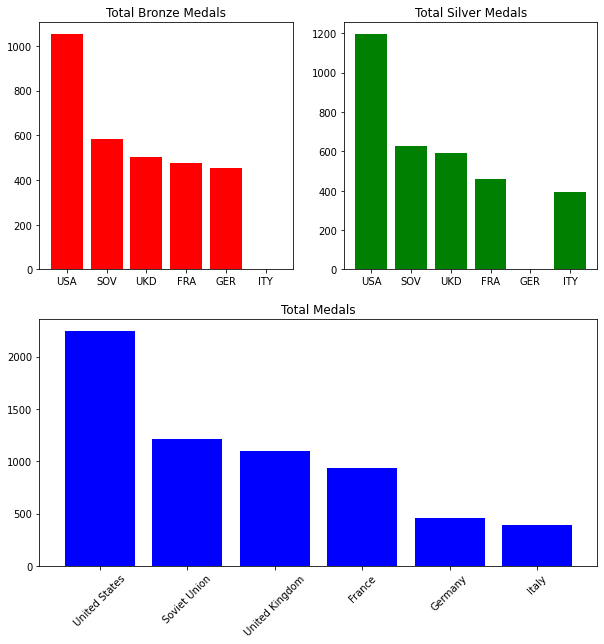

In [216]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots

gs = gridspec.GridSpec(2, 2, hspace=0.2)


pl.figure(figsize=[10,10], facecolor='w')
ax = pl.subplot(gs[0, 0]) # row 0, col 0
ax.set_xticklabels(result['NOC'])
ax.set_title("Total Bronze Medals")
pl.bar(result['Country'], height=result['Total_bronze_medals'], color='r')

ax = pl.subplot(gs[0, 1]) # row 0, col 1
ax.set_xticklabels(result['NOC'])
ax.set_title("Total Silver Medals")
pl.bar(result['Country'], height=result['Total_silver_medals'], color='g')

ax = pl.subplot(gs[1, :]) # row 1, span all columns
ax.set_title("Total Medals")
ax.set_xticklabels(result['Country'], rotation=45)
pl.bar(result['Country'], height=result['Total Medals'], color='b')
